In [2]:
pwd

'e:\\End-to-End-Project\\Advanced-Monitoring-System\\ml\\notebooks'

In [3]:
import os
os.chdir('..')

In [4]:
pwd

'e:\\End-to-End-Project\\Advanced-Monitoring-System\\ml'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r'metric_data/prometheus_metrics.csv')
data.head(15)

,timestamp,cpu_usage,memory_available,disk_read,disk_read_c,disk_read_d,disk_read_e,disk_write,disk_write_c,disk_write_d,disk_write_e,network_receive,network_transmit
0,2025-06-18 08:48:00,61.344277,3.931652e+09,6.766528e+06,6.766528e+06,33308.023467,250580.228267,148659.242667,148659.242667,89691.511467,0.0,3547.98115,1967.038967
1,2025-06-18 08:48:30,21.617188,3.896746e+09,8.434514e+06,8.434514e+06,37601.280000,427612.160000,149811.200000,149811.200000,73072.640000,0.0,2848.66000,1574.560000
2,2025-06-18 08:49:00,24.781250,3.892523e+09,3.097467e+06,3.097467e+06,14417.920000,629565.440000,46530.560000,46530.560000,4341.760000,0.0,147.12000,22.560000
3,2025-06-18 08:49:30,37.476562,3.912081e+09,1.801421e+05,1.801421e+05,0.000000,0.000000,24657.920000,24657.920000,3932.160000,0.0,250.16000,128.720000
4,2025-06-18 08:50:00,18.906250,3.929194e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,35553.280000,35553.280000,3932.160000,0.0,220.42000,29.940000
5,2025-06-18 08:50:30,9.476562,3.979903e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,55869.440000,55869.440000,4505.600000,0.0,299.76000,325.860000
6,2025-06-18 08:51:00,6.265625,4.016562e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,34324.480000,34324.480000,4259.840000,0.0,153.62000,33.180000
7,2025-06-18 08:51:30,13.289062,3.944497e+09,1.860608e+05,1.860608e+05,0.000000,0.000000,33095.680000,33095.680000,3932.160000,0.0,773.08000,887.260000
8,2025-06-18 08:52:00,20.289062,3.962737e+09,1.751552e+05,1.751552e+05,0.000000,0.000000,435978.240000,435978.240000,3768.320000,0.0,2639.80000,7791.020000
9,2025-06-18 08:52:30,20.070312,4.028805e+09,3.850240e+03,3.850240e+03,0.000000,0.000000,303431.680000,303431.680000,3522.560000,0.0,1694.88000,4626.560000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         341 non-null    object 
 1   cpu_usage         341 non-null    float64
 2   memory_available  341 non-null    float64
 3   disk_read         341 non-null    float64
 4   disk_read_c       341 non-null    float64
 5   disk_read_d       341 non-null    float64
 6   disk_read_e       341 non-null    float64
 7   disk_write        341 non-null    float64
 8   disk_write_c      341 non-null    float64
 9   disk_write_d      341 non-null    float64
 10  disk_write_e      341 non-null    float64
 11  network_receive   341 non-null    float64
 12  network_transmit  341 non-null    float64
dtypes: float64(12), object(1)
memory usage: 34.8+ KB


In [9]:
data.drop(['timestamp'], axis=1).corr()

,cpu_usage,memory_available,disk_read,disk_read_c,disk_read_d,disk_read_e,disk_write,disk_write_c,disk_write_d,disk_write_e,network_receive,network_transmit
cpu_usage,1.000000,-0.343672,-0.217388,-0.217388,0.170939,0.023147,-0.254551,-0.254551,0.154072,0.502865,0.264572,0.519249
memory_available,-0.343672,1.000000,0.404588,0.404588,0.121797,0.129366,0.367658,0.367658,0.072754,-0.078887,-0.417158,-0.223709
disk_read,-0.217388,0.404588,1.000000,1.000000,0.281773,0.359621,0.884641,0.884641,0.220084,-0.052565,-0.158404,-0.195498
disk_read_c,-0.217388,0.404588,1.000000,1.000000,0.281773,0.359621,0.884641,0.884641,0.220084,-0.052565,-0.158404,-0.195498
disk_read_d,0.170939,0.121797,0.281773,0.281773,1.000000,0.246218,-0.050008,-0.050008,0.801926,-0.007193,-0.035679,-0.008388
disk_read_e,0.023147,0.129366,0.359621,0.359621,0.246218,1.000000,0.170570,0.170570,0.135929,0.221595,-0.075132,-0.046207
disk_write,-0.254551,0.367658,0.884641,0.884641,-0.050008,0.170570,1.000000,1.000000,-0.042279,-0.045248,-0.143336,-0.187018
disk_write_c,-0.254551,0.367658,0.884641,0.884641,-0.050008,0.170570,1.000000,1.000000,-0.042279,-0.045248,-0.143336,-0.187018
disk_write_d,0.154072,0.072754,0.220084,0.220084,0.801926,0.135929,-0.042279,-0.042279,1.000000,-0.020770,0.019600,-0.014930
disk_write_e,0.502865,-0.078887,-0.052565,-0.052565,-0.007193,0.221595,-0.045248,-0.045248,-0.020770,1.000000,-0.033353,0.297295


In [13]:
drop_columns = ['timestamp', 'disk_read_c','disk_read_d', 'disk_read_e', 'disk_write_c', 'disk_write_d', 'disk_write_e' ]

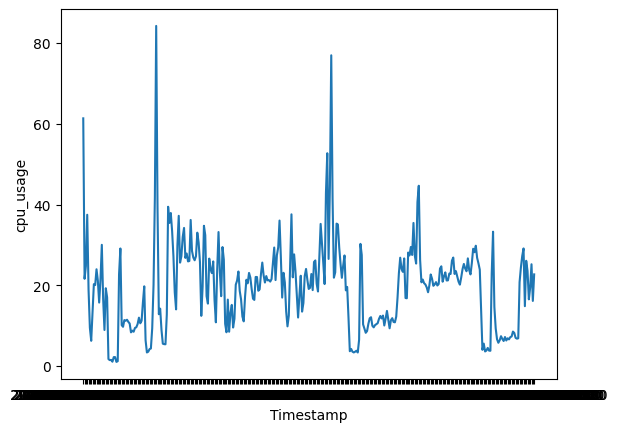

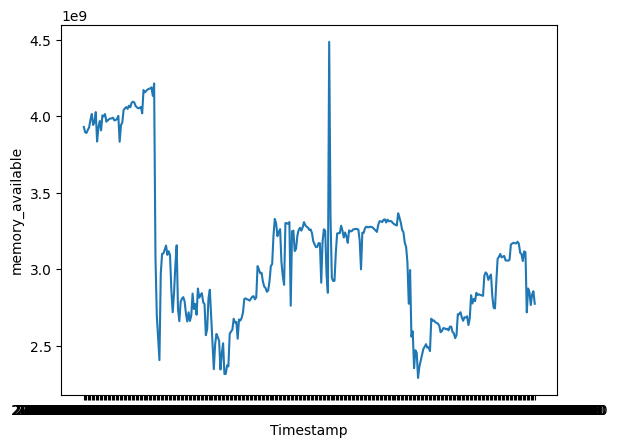

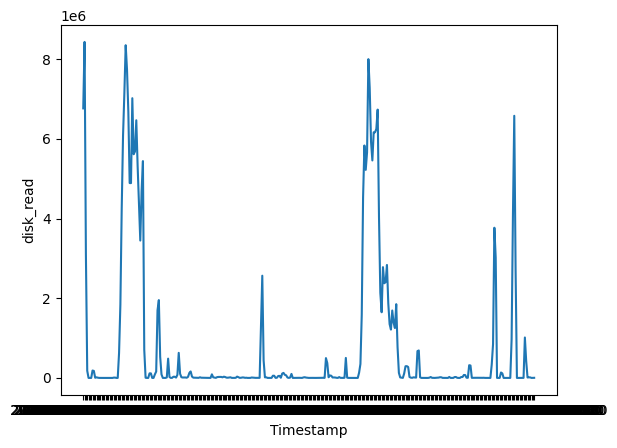

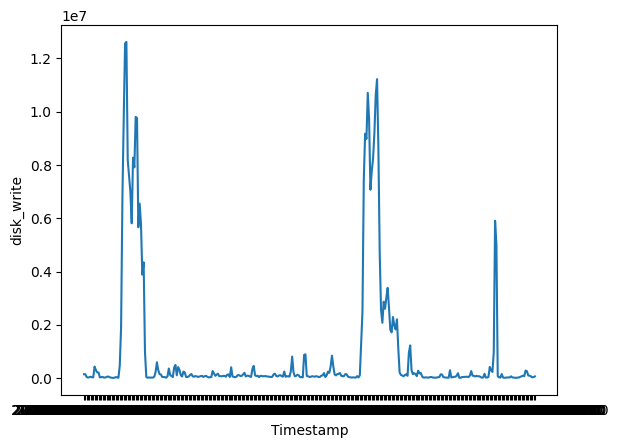

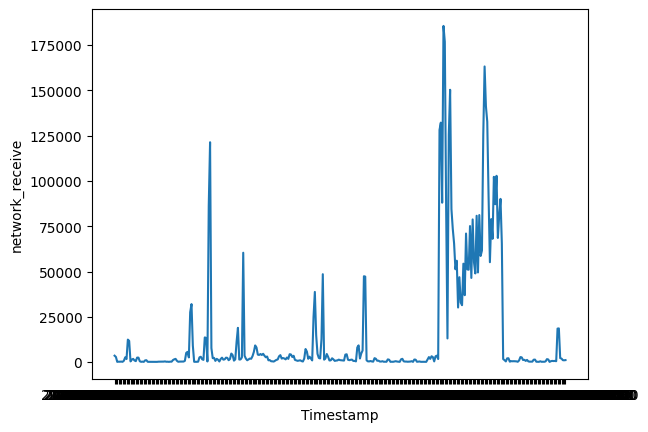

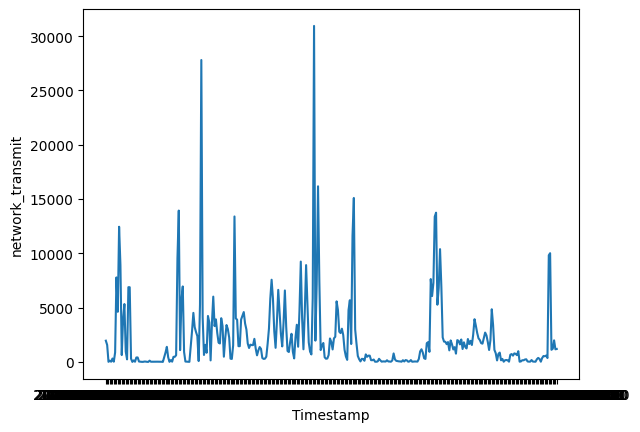

In [14]:
for name in data.columns:
    if name in drop_columns:
        pass
    else:
        plt.Figure(figsize=(14,6))
        sns.lineplot(data=data, x='timestamp', y=name)
        plt.xlabel('Timestamp')
        plt.ylabel(name)
        plt.show()

In [15]:
df = data.drop(['disk_read_c', 'disk_read_d', 'disk_read_e', 'disk_write_c', 'disk_write_d', 'disk_write_e'], axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,cpu_usage,memory_available,disk_read,disk_write,network_receive,network_transmit
0,2025-06-18 08:48:00,61.344277,3.931652e+09,6.766528e+06,148659.242667,3547.98115,1967.038967
1,2025-06-18 08:48:30,21.617188,3.896746e+09,8.434514e+06,149811.200000,2848.66000,1574.560000
2,2025-06-18 08:49:00,24.781250,3.892523e+09,3.097467e+06,46530.560000,147.12000,22.560000
3,2025-06-18 08:49:30,37.476562,3.912081e+09,1.801421e+05,24657.920000,250.16000,128.720000
4,2025-06-18 08:50:00,18.906250,3.929194e+09,0.000000e+00,35553.280000,220.42000,29.940000


In [16]:
df.set_index('timestamp', inplace=True)
split_index = df.index[0] + pd.Timedelta(hours=2.25)
train_df = df[df.index < split_index]
val_df = df[df.index >= split_index]

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2025-06-18 08:48:00 to 2025-06-18 11:02:30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         270 non-null    float64
 1   memory_available  270 non-null    float64
 2   disk_read         270 non-null    float64
 3   disk_write        270 non-null    float64
 4   network_receive   270 non-null    float64
 5   network_transmit  270 non-null    float64
dtypes: float64(6)
memory usage: 14.8 KB


In [18]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2025-06-18 11:03:00 to 2025-06-18 11:38:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         71 non-null     float64
 1   memory_available  71 non-null     float64
 2   disk_read         71 non-null     float64
 3   disk_write        71 non-null     float64
 4   network_receive   71 non-null     float64
 5   network_transmit  71 non-null     float64
dtypes: float64(6)
memory usage: 3.9 KB


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_df)
features = scaler.get_feature_names_out()

train_df[features] = scaler.transform(train_df)
val_df[features] = scaler.transform(val_df)

C:\Users\bilal\AppData\Local\Temp\ipykernel_11048\642768649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[features] = scaler.transform(train_df)
C:\Users\bilal\AppData\Local\Temp\ipykernel_11048\642768649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[features] = scaler.transform(val_df)


In [20]:
train_df.head()

,cpu_usage,memory_available,disk_read,disk_write,network_receive,network_transmit
timestamp,,,,,,
2025-06-18 08:48:00,0.724931,0.746927,0.802243,0.010949,0.018548,0.063189
2025-06-18 08:48:30,0.247370,0.731033,1.000000,0.011040,0.014776,0.050499
2025-06-18 08:49:00,0.285406,0.729110,0.367237,0.002847,0.000205,0.000320
2025-06-18 08:49:30,0.438017,0.738016,0.021358,0.001111,0.000761,0.003752
2025-06-18 08:50:00,0.214782,0.745808,0.000000,0.001976,0.000601,0.000559


In [21]:
val_df.head()

,cpu_usage,memory_available,disk_read,disk_write,network_receive,network_transmit
timestamp,,,,,,
2025-06-18 11:03:00,0.284560,0.139377,0.001794,0.010069,0.424074,0.058354
2025-06-18 11:03:30,0.238824,0.148042,0.000119,0.002159,0.296405,0.044615
2025-06-18 11:04:00,0.254226,0.147963,0.000041,0.001581,0.263329,0.040115
2025-06-18 11:04:30,0.266529,0.144806,0.000000,0.001046,0.434971,0.068210
2025-06-18 11:05:00,0.242393,0.146322,0.000000,0.000897,0.266301,0.053250


In [22]:
#train_df.to_csv('Training_df.csv')
#val_df.to_csv('Validation_df.csv')